In [ ]:
# Before beginning, you will need the QBED files merged by animal and sorted.
# The initial QBEDs can be downloaded from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE305773
# These files were merged by animal using 'cat' and then sorted using 'sort-bed' from bedops 2.4.40

In [2]:
# Load dependencies
import os
import re
import pycallingcards as cc
import pybedtools
import scanpy as sc
import pandas as pd
import scipy as sp
import numpy as np
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.multitest import fdrcorrection
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import pickle as pkl
from typing import Optional, Literal
from appdirs import user_cache_dir
from urllib import request
import tempfile

In [3]:
# Set working directory
cwd = os.getcwd()

In [3]:
# Initiate qbed dataframes
data9_4 = cc.rd.read_qbed(cwd+'/CT9_4_merged_sorted.qbed')
data9_4['SampleID'] = '9_4'
data9_4['Score'] = 1
data9_4

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,1,-,GTGT,9_4,1
1,chr1,3141138,3141139,1,+,CTCT,9_4,1
2,chr1,3164581,3164582,2,-,CATG,9_4,1
3,chr1,3164581,3164582,388,-,TCAG,9_4,1
4,chr1,3181598,3181599,298,-,CACA,9_4,1
...,...,...,...,...,...,...,...,...
116981,chrY,90803579,90803580,113,-,GTTG,9_4,1
116982,chrY,90803579,90803580,753,-,CTGA,9_4,1
116983,chrY,90805130,90805131,3,+,TGAC,9_4,1
116984,chrY,90805130,90805131,504,+,GGAA,9_4,1


In [4]:
data3_2 = cc.rd.read_qbed(cwd+'/CT3_2_merged_sorted.qbed')
data3_2['SampleID'] = '3_2'
data3_2['Score'] = 1
data3_2

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3167188,3167189,11,-,TCAG,3_2,1
1,chr1,3167188,3167189,7,-,CTCT,3_2,1
2,chr1,3209290,3209291,108,-,ACAC,3_2,1
3,chr1,3210131,3210132,1,-,GTAC,3_2,1
4,chr1,3214499,3214500,31,-,GTCA,3_2,1
...,...,...,...,...,...,...,...,...
177603,chrY,90798363,90798364,2,-,GCTA,3_2,1
177604,chrY,90799484,90799485,111,-,TCGA,3_2,1
177605,chrY,90801023,90801024,120,-,CATG,3_2,1
177606,chrY,90801184,90801185,1,-,TCGA,3_2,1


In [5]:
data5_2= cc.rd.read_qbed(cwd+'/CT5_2_merged_sorted.qbed')
data5_2['SampleID'] = '5_2'
data5_2['Score'] = 2
data5_2

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3120128,3120129,1,+,GCTA,5_2,2
1,chr1,3199281,3199282,447,-,GGAA,5_2,2
2,chr1,3205265,3205266,2,-,CCAC,5_2,2
3,chr1,3220514,3220515,1,-,GAAG,5_2,2
4,chr1,3221585,3221586,1,-,TCGA,5_2,2
...,...,...,...,...,...,...,...,...
109075,chrY,90802809,90802810,1105,-,CACA,5_2,2
109076,chrY,90802841,90802842,64,-,CATG,5_2,2
109077,chrY,90803917,90803918,1,+,TCAG,5_2,2
109078,chrY,90806260,90806261,44,-,CTCT,5_2,2


In [6]:
data4_3= cc.rd.read_qbed(cwd+'/CT4_3_merged_sorted.qbed')
data4_3['SampleID'] = '4_3'
data4_3['Score'] = 2
data4_3

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060870,3060871,22,-,GTCA,4_3,2
1,chr1,3074767,3074768,79,+,GAAG,4_3,2
2,chr1,3095378,3095379,138,+,CGAT,4_3,2
3,chr1,3119541,3119542,26,+,GGAA,4_3,2
4,chr1,3120189,3120190,66,+,TGAC,4_3,2
...,...,...,...,...,...,...,...,...
1309738,chrY,90810930,90810931,82,+,GTAC,4_3,2
1309739,chrY,90811001,90811002,18,+,GGAA,4_3,2
1309740,chrY,90811001,90811002,3,+,TCGA,4_3,2
1309741,chrY,90811001,90811002,36,+,CTTC,4_3,2


In [7]:
data1_5= cc.rd.read_qbed(cwd+'/CT1_5_merged_sorted.qbed')
data1_5['SampleID'] = '1_5'
data1_5['Score'] = 2
data1_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3043241,3043242,1,-,TCGA,1_5,2
1,chr1,3166176,3166177,18,-,CTGA,1_5,2
2,chr1,3167188,3167189,58,+,GGAA,1_5,2
3,chr1,3167188,3167189,64,-,GTTG,1_5,2
4,chr1,3167852,3167853,45,-,TCAG,1_5,2
...,...,...,...,...,...,...,...,...
305562,chrY,90803579,90803580,105,-,GTAC,1_5,2
305563,chrY,90805420,90805421,34,-,CATG,1_5,2
305564,chrY,90806776,90806777,14,+,CTGA,1_5,2
305565,chrY,90810930,90810931,1,+,GAAG,1_5,2


In [8]:
data4_2= cc.rd.read_qbed(cwd+'/CT4_2_merged_sorted.qbed')
data4_2['SampleID'] = '4_2'
data4_2['Score'] = 2
data4_2

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3095378,3095379,229,+,TGAC,4_2,2
1,chr1,3113460,3113461,75,-,TCAG,4_2,2
2,chr1,3118166,3118167,286,-,GGAA,4_2,2
3,chr1,3121337,3121338,1,+,TTGG,4_2,2
4,chr1,3167188,3167189,3,-,GAGA,4_2,2
...,...,...,...,...,...,...,...,...
755379,chrY,90806053,90806054,46,+,CTGA,4_2,2
755380,chrY,90808000,90808001,4,+,CTCT,4_2,2
755381,chrY,90808151,90808152,13,-,GTAC,4_2,2
755382,chrY,90808770,90808771,86,+,GAGA,4_2,2


In [9]:
data9_7= cc.rd.read_qbed(cwd+'/CT9_7_merged_sorted.qbed')
data9_7['SampleID'] = '9_7'
data9_7['Score'] = 3
data9_7

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3038547,3038548,1,+,TCGA,9_7,3
1,chr1,3057417,3057418,559,-,CATG,9_7,3
2,chr1,3121337,3121338,1,+,TTGG,9_7,3
3,chr1,3196247,3196248,163,-,TGAC,9_7,3
4,chr1,3209003,3209004,1,-,CATG,9_7,3
...,...,...,...,...,...,...,...,...
116548,chrY,90800706,90800707,1,+,TTGG,9_7,3
116549,chrY,90801705,90801706,2,-,TCGA,9_7,3
116550,chrY,90805991,90805992,2257,+,TTGG,9_7,3
116551,chrY,90810930,90810931,1,-,TGAC,9_7,3


In [10]:
data5_1= cc.rd.read_qbed(cwd+'/CT5_1_merged_sorted.qbed')
data5_1['SampleID'] = '5_1'
data5_1['Score'] = 3
data5_1

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3246240,3246241,74,-,CTGA,5_1,3
1,chr1,3246901,3246902,1,-,CATG,5_1,3
2,chr1,3247058,3247059,391,-,TCAG,5_1,3
3,chr1,3255388,3255389,259,-,GGAA,5_1,3
4,chr1,3269075,3269076,1,-,GTGT,5_1,3
...,...,...,...,...,...,...,...,...
82280,chrY,90800706,90800707,131,+,CTTC,5_1,3
82281,chrY,90803579,90803580,1150,-,TGAC,5_1,3
82282,chrY,90805130,90805131,106,+,TGAC,5_1,3
82283,chrY,90808093,90808094,9,+,CGAT,5_1,3


In [11]:
data16_7= cc.rd.read_qbed(cwd+'/CT16_7_merged_sorted.qbed')
data16_7['SampleID'] = '16_7'
data16_7['Score'] = 2
data16_7

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3025529,3025530,21,+,GAAG,16_7,2
1,chr1,3048299,3048300,6,-,GTGT,16_7,2
2,chr1,3081057,3081058,1,+,TGAC,16_7,2
3,chr1,3095378,3095379,11,+,GAGA,16_7,2
4,chr1,3109391,3109392,1,-,GGAA,16_7,2
...,...,...,...,...,...,...,...,...
1001260,chrY,90806531,90806532,95,-,TCAG,16_7,2
1001261,chrY,90808975,90808976,13,+,GTTG,16_7,2
1001262,chrY,90809102,90809103,4,-,GAGA,16_7,2
1001263,chrY,90810374,90810375,4,-,TCAG,16_7,2


In [12]:
data14_5= cc.rd.read_qbed(cwd+'/CT14_5_merged_sorted.qbed')
data14_5['SampleID'] = '14_5'
data14_5['Score'] = 3
data14_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,75,-,GAAG,14_5,3
1,chr1,3080872,3080873,18,+,TGAC,14_5,3
2,chr1,3116974,3116975,44,-,TTGG,14_5,3
3,chr1,3121275,3121276,21,-,GAAG,14_5,3
4,chr1,3121275,3121276,3,-,CAGT,14_5,3
...,...,...,...,...,...,...,...,...
719673,chrY,90805552,90805553,29,-,GTAC,14_5,3
719674,chrY,90805552,90805553,6,-,CGAT,14_5,3
719675,chrY,90805552,90805553,8,-,TTGG,14_5,3
719676,chrY,90809108,90809109,5,-,GAAG,14_5,3


In [13]:
data15_7= cc.rd.read_qbed(cwd+'/CT15_7_merged_sorted.qbed')
data15_7['SampleID'] = '15_7'
data15_7['Score'] = 3
data15_7

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3094848,3094849,245,-,CATG,15_7,3
1,chr1,3094903,3094904,277,-,TGAC,15_7,3
2,chr1,3119110,3119111,125,+,CAGT,15_7,3
3,chr1,3121275,3121276,1,-,GAAG,15_7,3
4,chr1,3125573,3125574,7,-,GTTG,15_7,3
...,...,...,...,...,...,...,...,...
385263,chrY,90806500,90806501,1,-,GGAA,15_7,3
385264,chrY,90806531,90806532,1,-,GCTA,15_7,3
385265,chrY,90808105,90808106,27,+,CTCT,15_7,3
385266,chrY,90808770,90808771,405,+,TTGG,15_7,3


In [14]:
# Merge mild qbeds
mild = cc.rd.combine_qbed([data9_4,data3_2,data5_2,data4_3,data1_5,data4_2,data9_7,data5_1,data16_7,data14_5,data15_7])
mild['group'] = 'mild'
mild

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3038547,3038548,1,+,TCGA,9_7,3,mild
2,chr1,3043241,3043242,1,-,TCGA,1_5,2,mild
3,chr1,3048299,3048300,6,-,GTGT,16_7,2,mild
4,chr1,3057417,3057418,559,-,CATG,9_7,3,mild
...,...,...,...,...,...,...,...,...,...
5079412,chrY,90811001,90811002,279,+,CTTC,1_5,2,mild
5079413,chrY,90811001,90811002,1,+,CACA,9_7,3,mild
5079414,chrY,90811001,90811002,93,+,GCTA,5_1,3,mild
5079415,chrY,90811001,90811002,1838,+,TCAG,14_5,3,mild


In [15]:
# Initiate qbed dataframes
data7_4= cc.rd.read_qbed(cwd+'/CT7_4_merged_sorted.qbed')
data7_4['SampleID'] = '7_4'
data7_4['Score'] = 6
data7_4

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,1,-,GTGT,7_4,6
1,chr1,3119541,3119542,2095,+,TGAC,7_4,6
2,chr1,3120128,3120129,1,+,GCTA,7_4,6
3,chr1,3120128,3120129,447,+,CTGA,7_4,6
4,chr1,3121337,3121338,1,+,TTGG,7_4,6
...,...,...,...,...,...,...,...,...
224546,chrY,90801184,90801185,1,-,CTGA,7_4,6
224547,chrY,90805130,90805131,4,+,CTTC,7_4,6
224548,chrY,90806198,90806199,20,+,TGAC,7_4,6
224549,chrY,90809013,90809014,1,-,GTAC,7_4,6


In [16]:
data5_5= cc.rd.read_qbed(cwd+'/CT5_5_merged_sorted.qbed')
data5_5['SampleID'] = '5_5'
data5_5['Score'] = 7
data5_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3120128,3120129,1,+,CTGA,5_5,7
1,chr1,3121337,3121338,2,+,TTGG,5_5,7
2,chr1,3202512,3202513,1,-,CTTC,5_5,7
3,chr1,3203772,3203773,1,+,CTGA,5_5,7
4,chr1,3210000,3210001,1,-,CTGA,5_5,7
...,...,...,...,...,...,...,...,...
371247,chrY,90802841,90802842,1,-,TCAG,5_5,7
371248,chrY,90805420,90805421,2,-,CTGA,5_5,7
371249,chrY,90808770,90808771,1,+,GAGA,5_5,7
371250,chrY,90809013,90809014,2,-,GTAC,5_5,7


In [17]:
data6_5= cc.rd.read_qbed(cwd+'/CT6_5_merged_sorted.qbed')
data6_5['SampleID'] = '6_5'
data6_5['Score'] = 8
data6_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,2,-,GTGT,6_5,8
1,chr1,3121337,3121338,4,+,TTGG,6_5,8
2,chr1,3191538,3191539,576,+,TCAG,6_5,8
3,chr1,3198777,3198778,41,+,CTGA,6_5,8
4,chr1,3200455,3200456,2,-,GGAA,6_5,8
...,...,...,...,...,...,...,...,...
255216,chrY,90809013,90809014,1,-,TTGG,6_5,8
255217,chrY,90809013,90809014,2,-,GTAC,6_5,8
255218,chrY,90810374,90810375,4,-,GTAC,6_5,8
255219,chrY,90810897,90810898,1,-,TGGT,6_5,8


In [18]:
data1_3= cc.rd.read_qbed(cwd+'/CT1_3_merged_sorted.qbed')
data1_3['SampleID'] = '1_3'
data1_3['Score'] = 8
data1_3

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3199307,3199308,1,+,GCTA,1_3,8
1,chr1,3208599,3208600,1121,-,CACA,1_3,8
2,chr1,3266091,3266092,1,-,ACAC,1_3,8
3,chr1,3321229,3321230,1,-,CTTC,1_3,8
4,chr1,3321827,3321828,2,-,TGAC,1_3,8
...,...,...,...,...,...,...,...,...
40908,chrX,169930028,169930029,1,-,GAAG,1_3,8
40909,chrX,169930539,169930540,1,-,GAAG,1_3,8
40910,chrY,327433,327434,1,-,CACA,1_3,8
40911,chrY,90801184,90801185,1,-,TGAC,1_3,8


In [19]:
data3_1= cc.rd.read_qbed(cwd+'/CT3_1_merged_sorted.qbed')
data3_1['SampleID'] = '3_1'
data3_1['Score'] = 8
data3_1

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3168084,3168085,23,-,GTCA,3_1,8
1,chr1,3182714,3182715,10,+,GGAA,3_1,8
2,chr1,3187307,3187308,17,-,GTGT,3_1,8
3,chr1,3191261,3191262,13,-,GTTG,3_1,8
4,chr1,3202973,3202974,47,-,TCAG,3_1,8
...,...,...,...,...,...,...,...,...
623218,chrY,90806021,90806022,79,-,TGAC,3_1,8
623219,chrY,90806053,90806054,2,+,TCAG,3_1,8
623220,chrY,90806260,90806261,9,-,GTCA,3_1,8
623221,chrY,90806531,90806532,18,-,GGAA,3_1,8


In [20]:
data2_2= cc.rd.read_qbed(cwd+'/CT2_2_merged_sorted.qbed')
data2_2['SampleID'] = '2_2'
data2_2['Score'] = 8
data2_2

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3034165,3034166,1,+,CGAT,2_2,8
1,chr1,3036943,3036944,397,+,TCAG,2_2,8
2,chr1,3109918,3109919,74,+,GTTG,2_2,8
3,chr1,3119541,3119542,399,+,GAAG,2_2,8
4,chr1,3120189,3120190,116,+,CTGA,2_2,8
...,...,...,...,...,...,...,...,...
738240,chrY,90811001,90811002,1,+,GTAC,2_2,8
738241,chrY,90811001,90811002,186,+,GGAA,2_2,8
738242,chrY,90811001,90811002,299,+,GTTG,2_2,8
738243,chrY,90811001,90811002,311,+,TTGG,2_2,8


In [21]:
data9_5= cc.rd.read_qbed(cwd+'/CT9_5_merged_sorted.qbed')
data9_5['SampleID'] = '9_5'
data9_5['Score'] = 8
data9_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,1,-,GTGT,9_5,8
1,chr1,3113027,3113028,2,+,ACAC,9_5,8
2,chr1,3120128,3120129,202,-,GCTA,9_5,8
3,chr1,3121337,3121338,2,+,TTGG,9_5,8
4,chr1,3135665,3135666,14,+,CGTA,9_5,8
...,...,...,...,...,...,...,...,...
1074588,chrY,90808128,90808129,241,-,GTAC,9_5,8
1074589,chrY,90808151,90808152,1,-,CTCT,9_5,8
1074590,chrY,90808770,90808771,58,+,TTGG,9_5,8
1074591,chrY,90809013,90809014,2,-,GTAC,9_5,8


In [22]:
data8_1= cc.rd.read_qbed(cwd+'/CT8_1_merged_sorted.qbed')
data8_1['SampleID'] = '8_1'
data8_1['Score'] = 8
data8_1

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060728,3060729,112,-,GTGT,8_1,8
1,chr1,3074767,3074768,5,+,ACAC,8_1,8
2,chr1,3119238,3119239,4,-,TTGG,8_1,8
3,chr1,3167188,3167189,8,-,GTCA,8_1,8
4,chr1,3192464,3192465,16,-,TCGA,8_1,8
...,...,...,...,...,...,...,...,...
520016,chrY,90806053,90806054,44,+,ACAC,8_1,8
520017,chrY,90809013,90809014,75,-,GTAC,8_1,8
520018,chrY,90809522,90809523,1,+,TTGG,8_1,8
520019,chrY,90809522,90809523,435,+,GTTG,8_1,8


In [23]:
data11_1= cc.rd.read_qbed(cwd+'/CT11_1_merged_sorted.qbed')
data11_1['SampleID'] = '11_1'
data11_1['Score'] = 8
data11_1

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3056542,3056543,1,+,GAAG,11_1,8
1,chr1,3110349,3110350,1,-,TCGA,11_1,8
2,chr1,3198305,3198306,70,+,GTTG,11_1,8
3,chr1,3202973,3202974,105,-,TGAC,11_1,8
4,chr1,3208004,3208005,3461,-,GTCA,11_1,8
...,...,...,...,...,...,...,...,...
305522,chrY,90806531,90806532,1,-,GTAC,11_1,8
305523,chrY,90809013,90809014,182,-,CTGA,11_1,8
305524,chrY,90810930,90810931,648,+,CTTC,11_1,8
305525,chrY,90811001,90811002,326,+,GAGA,11_1,8


In [24]:
data11_5= cc.rd.read_qbed(cwd+'/CT11_5_merged_sorted.qbed')
data11_5['SampleID'] = '11_5'
data11_5['Score'] = 8
data11_5

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3113027,3113028,4,-,CGAT,11_5,8
1,chr1,3182714,3182715,4,-,CTTC,11_5,8
2,chr1,3183871,3183872,58,-,ACAC,11_5,8
3,chr1,3199281,3199282,58,-,GAGA,11_5,8
4,chr1,3200501,3200502,399,+,TCAG,11_5,8
...,...,...,...,...,...,...,...,...
458937,chrY,90808770,90808771,49,+,TGAC,11_5,8
458938,chrY,90810497,90810498,8,-,CCAC,11_5,8
458939,chrY,90810930,90810931,1,+,CACA,11_5,8
458940,chrY,90810930,90810931,1,+,GGAA,11_5,8


In [25]:
data16_6= cc.rd.read_qbed(cwd+'/CT16_6_merged_sorted.qbed')
data16_6['SampleID'] = '16_6'
data16_6['Score'] = 8
data16_6

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score
0,chr1,3060870,3060871,130,+,TCGA,16_6,8
1,chr1,3081057,3081058,1086,+,TGAC,16_6,8
2,chr1,3092819,3092820,2,-,TCGA,16_6,8
3,chr1,3120205,3120206,343,+,GTTG,16_6,8
4,chr1,3121229,3121230,6,-,CGTA,16_6,8
...,...,...,...,...,...,...,...,...
415919,chrY,90805530,90805531,61,-,GCTA,16_6,8
415920,chrY,90805530,90805531,63,-,CGTA,16_6,8
415921,chrY,90805991,90805992,111,-,GTAC,16_6,8
415922,chrY,90806198,90806199,24,+,CGTA,16_6,8


In [26]:
# Merge severe qbeds
severe = cc.rd.combine_qbed([data7_4,data5_5,data6_5,data1_3,data3_1,data2_2,data9_5,data8_1,data11_1,data11_5,data16_6])
severe['group'] = 'severe'
severe

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3034165,3034166,1,+,CGAT,2_2,8,severe
1,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
2,chr1,3056542,3056543,1,+,GAAG,11_1,8,severe
3,chr1,3060728,3060729,1,-,GTGT,7_4,6,severe
4,chr1,3060728,3060729,2,-,GTGT,6_5,8,severe
...,...,...,...,...,...,...,...,...,...
5028407,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
5028408,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
5028409,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
5028410,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [27]:
# Merge mild and severe qbeds
total_data = cc.rd.combine_qbed([mild,severe])
total_data

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3034165,3034166,1,+,CGAT,2_2,8,severe
2,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
3,chr1,3038547,3038548,1,+,TCGA,9_7,3,mild
4,chr1,3043241,3043242,1,-,TCGA,1_5,2,mild
...,...,...,...,...,...,...,...,...,...
10107824,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
10107825,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
10107826,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
10107827,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [28]:
# Filter by insertions with reads > 1
total_data = total_data[total_data['Reads']  > 1]
total_data = total_data.reset_index(drop=True)
total_data

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
2,chr1,3048299,3048300,6,-,GTGT,16_7,2,mild
3,chr1,3057417,3057418,559,-,CATG,9_7,3,mild
4,chr1,3060728,3060729,75,-,GAAG,14_5,3,mild
...,...,...,...,...,...,...,...,...,...
8310869,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
8310870,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
8310871,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
8310872,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [ ]:
# Write output to file
cc.rd.save_qbed(total_data,"total_data_original.txt")

In [ ]:
# Read data as pandas dataframe
total_data = pd.read_csv("total_data_original.txt",sep = '\t',header= None)
total_data.columns = ['Chr','Start','End','Reads','Direction','Barcodes','SampleID','Score','group']
total_data

In [ ]:
total_data_severe = total_data[total_data['group'] == 'severe']
total_data_severe = total_data_severe.reset_index(drop=True)
total_data_severe

In [ ]:
total_data_mild = total_data[total_data['group'] == 'mild']
total_data_mild = total_data_mild.reset_index(drop=True)
total_data_mild

In [ ]:
# call peaks on mild data
peak_data_mild = cc.pp.call_peaks(total_data_mild , method = "MACCs", reference = "mm10", pvalue_adj_cutoff = 0, 
                            window_size=2000, step_size=800, lam_win_size = 1000000, pseudocounts = 1,
                             record = True, save = "peak_mild.bed")
peak_data_mild 

In [ ]:
# call peaks on severe data
peak_data_severe = cc.pp.call_peaks(total_data_severe , method = "MACCs", reference = "mm10", pvalue_adj_cutoff = 0, 
                            window_size=2000, step_size=800, lam_win_size = 1000000, pseudocounts = 1,
                             record = True, save = "peak_severe.bed")
peak_data_severe

In [ ]:
# combine both sets of peaks
peak = cc.rd.combine_qbed([peak_data_mild, peak_data_severe])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe()
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})

In [ ]:
# Annotate peaks - short form for now
peak_annotation = cc.pp.annotation(peak_data, reference = "mm10")
peak_annotation = cc.pp.combine_annotation(peak_data, peak_annotation)
peak_annotation

In [ ]:
# Make a group by peak Anndata object
adata_cc = cc.pp.make_Anndata(total_data, peak_annotation, ['9_4', '3_2', '5_2', '4_3', '1_5', '4_2', '9_7', '5_1', '16_7', '14_5', '15_7',
                                                           '7_4', '5_5', '6_5', '1_3', '3_1', '2_2', '9_5', '8_1', '11_1', '11_5', '16_6'], key = 'SampleID')
adata_cc

In [ ]:
adata_cc.obs["group"] = np.array(["mild", "mild", "mild", "mild","mild", "mild", "mild", "mild","mild", "mild", "mild",
                                 "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe"])
adata_cc.obs

In [ ]:
np.array(adata_cc.X.todense())

In [ ]:
rounded_array = np.round(adata_cc.X.todense()).T
np.savetxt("array_peak_cell.csv", rounded_array, delimiter=",", fmt="%.0f")

In [ ]:
# Convert to a dataframe
df_mild1 = pd.DataFrame(
    adata_cc[adata_cc.obs['group'] == 'mild'].X.todense(),
    index=adata_cc[adata_cc.obs['group'] == 'mild'].obs_names,
    columns=adata_cc.var_names
)
df_mild1 = df_mild1.T
df_mild1

In [ ]:
# write output to file
df_mild1.to_csv("orig_ins_counts_mild.csv")

In [ ]:
# Convert to a dataframe
df_severe1 = pd.DataFrame(
    adata_cc[adata_cc.obs['group'] == 'severe'].X.todense(),
    index=adata_cc[adata_cc.obs['group'] == 'severe'].obs_names,
    columns=adata_cc.var_names
)
df_severe1 = df_severe1.T
df_severe1

In [ ]:
# write output to file
df_severe1.to_csv("orig_ins_counts_severe.csv")

In [ ]:
# read insertion files
df_severe = pd.read_csv("orig_ins_counts_severe.csv",index_col=0)
df_severe

In [ ]:
# read insertion files
df_mild = pd.read_csv("orig_ins_counts_mild.csv",index_col=0)
df_mild

In [ ]:
# combine insertion files
df_all = pd.concat([df_mild, df_severe],axis=1)
df_all

In [ ]:
# Run pairwise correlation coefficients on insertions by peak between animals
#sets the figure DPI for the matplotlib plots
plt.rcParams['figure.dpi'] = 600

# correlation
plt.matshow(np.corrcoef(df_all.T))

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix ', fontsize=16);
plt.savefig('pearson_all.pdf')
plt.show()

In [29]:
# Exclude samples with lowest correlation and re-run everything so far
total_data = total_data[total_data['SampleID'] != '9_7']
total_data = total_data[total_data['SampleID'] != '1_3']
total_data.reset_index(drop=True)
total_data

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
2,chr1,3048299,3048300,6,-,GTGT,16_7,2,mild
4,chr1,3060728,3060729,75,-,GAAG,14_5,3,mild
5,chr1,3060728,3060729,2,-,GTGT,6_5,8,severe
...,...,...,...,...,...,...,...,...,...
8310869,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
8310870,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
8310871,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
8310872,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [ ]:
# Write output to file
cc.rd.save_qbed(total_data,"total_data.txt")

In [4]:
# Read data as pandas dataframe
total_data = pd.read_csv("total_data.txt",sep = '\t',header= None)
total_data.columns = ['Chr','Start','End','Reads','Direction','Barcodes','SampleID','Score','group']
total_data

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
2,chr1,3048299,3048300,6,-,GTGT,16_7,2,mild
3,chr1,3060728,3060729,75,-,GAAG,14_5,3,mild
4,chr1,3060728,3060729,2,-,GTGT,6_5,8,severe
...,...,...,...,...,...,...,...,...,...
8238101,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
8238102,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
8238103,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
8238104,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [5]:
total_data_severe = total_data[total_data['group'] == 'severe']
total_data_severe = total_data_severe.reset_index(drop=True)
total_data_severe

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3036943,3036944,397,+,TCAG,2_2,8,severe
1,chr1,3060728,3060729,2,-,GTGT,6_5,8,severe
2,chr1,3060728,3060729,112,-,GTGT,8_1,8,severe
3,chr1,3060870,3060871,130,+,TCGA,16_6,8,severe
4,chr1,3074767,3074768,5,+,ACAC,8_1,8,severe
...,...,...,...,...,...,...,...,...,...
3916318,chrY,90811001,90811002,311,+,TTGG,2_2,8,severe
3916319,chrY,90811001,90811002,326,+,TCGA,2_2,8,severe
3916320,chrY,90811001,90811002,146,+,TGAC,9_5,8,severe
3916321,chrY,90811001,90811002,326,+,GAGA,11_1,8,severe


In [6]:
total_data_mild = total_data[total_data['group'] == 'mild']
total_data_mild = total_data_mild.reset_index(drop=True)
total_data_mild

,Chr,Start,End,Reads,Direction,Barcodes,SampleID,Score,group
0,chr1,3025529,3025530,21,+,GAAG,16_7,2,mild
1,chr1,3048299,3048300,6,-,GTGT,16_7,2,mild
2,chr1,3060728,3060729,75,-,GAAG,14_5,3,mild
3,chr1,3060870,3060871,22,-,GTCA,4_3,2,mild
4,chr1,3074767,3074768,79,+,GAAG,4_3,2,mild
...,...,...,...,...,...,...,...,...,...
4321778,chrY,90811001,90811002,40,+,CAAC,4_3,2,mild
4321779,chrY,90811001,90811002,279,+,CTTC,1_5,2,mild
4321780,chrY,90811001,90811002,93,+,GCTA,5_1,3,mild
4321781,chrY,90811001,90811002,1838,+,TCAG,14_5,3,mild


In [7]:
# call peaks on mild data
peak_data_mild = cc.pp.call_peaks(total_data_mild , method = "MACCs", reference = "mm10", pvalue_adj_cutoff = 0, 
                            window_size=2000, step_size=800, lam_win_size = 1000000, pseudocounts = 1,
                             record = True, save = "peak_mild.bed")
peak_data_mild 

For the MACCS method without background, [expdata, reference, pvalue_cutoff, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 21/21 [06:56<00:00, 19.82s/it]


,Chr,Start,End,Center,pvalue,Experiment Insertions,Reference Insertions,Fraction Experiment,TPH Experiment,Expect insertions,pvalue_adj
0,chr1,3296871,3300418,3298062.0,0.0,74,26,0.000017,1712.256261,14.541241,0.0
1,chr1,3309788,3310809,3310316.0,0.0,35,7,0.000008,809.850934,4.568548,0.0
2,chr1,3319892,3324489,3322242.0,0.0,81,40,0.000019,1874.226448,21.121212,0.0
3,chr1,3365567,3372481,3367704.0,0.0,120,33,0.000028,2776.631774,16.891760,0.0
4,chr1,3379146,3383205,3382087.0,0.0,53,26,0.000012,1226.345700,13.307774,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15120,chrX,169810037,169813700,169811358.0,0.0,36,34,0.000008,832.989532,6.195730,0.0
15121,chrX,169922506,169926762,169925135.0,0.0,33,30,0.000008,763.573738,5.439762,0.0
15122,chrX,169928521,169932808,169930295.0,0.0,34,32,0.000008,786.712336,5.771930,0.0
15123,chrX,169981249,169985046,169982603.0,0.0,34,22,0.000008,786.712336,4.572023,0.0


In [8]:
# call peaks on severe data
peak_data_severe = cc.pp.call_peaks(total_data_severe , method = "MACCs", reference = "mm10", pvalue_adj_cutoff = 0, 
                            window_size=2000, step_size=800, lam_win_size = 1000000, pseudocounts = 1,
                             record = True, save = "peak_severe.bed")
peak_data_severe

For the MACCS method without background, [expdata, reference, pvalue_cutoff, lam_win_size, window_size, step_size, extend, pseudocounts, test_method, min_insertions, record] would be utilized.


100%|██████████| 21/21 [06:08<00:00, 17.56s/it]


,Chr,Start,End,Center,pvalue,Experiment Insertions,Reference Insertions,Fraction Experiment,TPH Experiment,Expect insertions,pvalue_adj
0,chr1,3245070,3247104,3246557.0,0.0,80,27,0.000020,2042.732430,14.968828,0.0
1,chr1,3319980,3324705,3322046.0,0.0,72,41,0.000018,1838.459187,20.249337,0.0
2,chr1,3365567,3371802,3367385.0,0.0,128,29,0.000033,3268.371889,14.027467,0.0
3,chr1,3375994,3382969,3379785.0,0.0,91,48,0.000023,2323.608140,22.241281,0.0
4,chr1,3385795,3392284,3388618.0,0.0,87,50,0.000022,2221.471518,22.933380,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13748,chrX,168123900,168124857,168124423.0,0.0,40,10,0.000010,1021.366215,3.187148,0.0
13749,chrX,169795376,169797586,169797383.0,0.0,29,19,0.000007,740.490506,3.468396,0.0
13750,chrX,169810706,169813700,169811678.0,0.0,37,29,0.000009,944.763749,4.800587,0.0
13751,chrX,169979401,169985593,169982706.5,0.0,44,38,0.000011,1123.502837,6.537052,0.0


In [9]:
# combine both sets of peaks
peak = cc.rd.combine_qbed([peak_data_mild, peak_data_severe])
peak = pybedtools.BedTool.from_dataframe(peak).merge().to_dataframe()
peak_data = peak.rename(columns={"chrom":"Chr", "start":"Start", "end":"End"})

In [10]:
peak_data

,Chr,Start,End
0,chr1,3245070,3247104
1,chr1,3296871,3300418
2,chr1,3309788,3310809
3,chr1,3319892,3324705
4,chr1,3365567,3372481
...,...,...,...
16867,chrX,169810037,169813700
16868,chrX,169922506,169926762
16869,chrX,169928521,169932808
16870,chrX,169979401,169985593


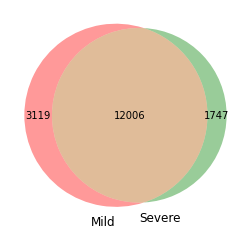

In [11]:
# Plot common peaks
common = len(peak_data_severe) + len(peak_data_mild) - len(peak_data)
# Use the venn2 function
venn2(subsets = (len(peak_data_mild) - common, len(peak_data_severe) - common, common), set_labels = ('Mild', 'Severe'))
plt.show()

In [ ]:
#generates a WashU browser URL to visualize the insertion dataset and peak data
qbed = {"Severe": total_data_severe, "Mild": total_data_mild}
bed = {"peak": peak_data}
cc.pl.WashU_browser_url(qbed = qbed,bed = bed, genome = 'mm10')
#used this and then BigWig file from H3K27ac ChIP-seq on postnatal 0 day mouse forebrain ENCSR094TTT ENCFF278XNQ

In [12]:
# Peak annotation function
# Improved annotation - 5 closest genes within 1 Mb with pre-filtering
def custom_chr_sort_key(chr_name):
    """ Key function for custom sorting of chromosome names """
    chr_name = chr_name.lower().replace('chr', '')
    if chr_name.isdigit():
        return int(chr_name)
    elif chr_name == 'x':
        return 20
    elif chr_name == 'y':
        return 21
    elif chr_name in ['m', 'mt']:
        return 22
    else:
        return 23  # Any other chromosomes will be sorted after Y

def improved_annotation(
    peaks_frame: pd.DataFrame = None,
    peaks_path: str = None,
    reference: Optional[Literal["hg38", "mm10", "sacCer3"]] = "hg38",
    save_annotation: str = None,
    bedtools_path: str = None,
    refGene: pd.DataFrame = None,
    distance_threshold: int = 1000000,  # Default 1Mb threshold
    debug: bool = False
) -> pd.DataFrame:
    """
    Annotate peak data using bedtools, finding up to 5 closest genes within a specified distance,
    excluding Rik genes, Gm genes, and other specified gene types.
    
    Parameters:
    - peaks_frame: pd.DataFrame with the first three columns as chromosome, start and end.
    - peaks_path: Path to the peak data file.
    - reference: Reference genome ("hg38", "mm10", or "sacCer3").
    - save_annotation: Path to save the annotation results.
    - bedtools_path: Path to bedtools executable.
    - refGene: Custom reference gene DataFrame.
    - distance_threshold: Maximum distance (in base pairs) to consider a gene as "close" (default: 1000000).
    - debug: If True, print debugging information.
    
    Returns:
    pd.DataFrame with peak information and up to 5 closest genes within the distance threshold 
    (excluding specified gene types).
    """
    if bedtools_path:
        pybedtools.helpers.set_bedtools_path(bedtools_path)

    # Create a temporary directory
    with tempfile.TemporaryDirectory() as tmpdir:
        # Prepare peaks data
        if peaks_path:
            peaks_df = pd.read_csv(peaks_path, sep='\t', header=None, names=['Chr', 'Start', 'End'])
        elif isinstance(peaks_frame, pd.DataFrame):
            peaks_df = peaks_frame[['Chr', 'Start', 'End']].copy()
        else:
            raise ValueError("Please provide either peaks_frame or peaks_path.")

        peaks_df['Chr'] = peaks_df['Chr'].astype(str)
        
        # Save peaks to a temporary file
        unsorted_peaks_path = os.path.join(tmpdir, "unsorted_peaks.bed")
        peaks_df.to_csv(unsorted_peaks_path, sep='\t', header=False, index=False)
        
        # Sort peaks using bedtools sort
        sorted_peaks_path = os.path.join(tmpdir, "sorted_peaks.bed")
        pybedtools.BedTool(unsorted_peaks_path).sort().saveas(sorted_peaks_path)
        peaks_bed = pybedtools.BedTool(sorted_peaks_path)

        # Prepare reference gene data
        if not isinstance(refGene, pd.DataFrame):
            PYCALLINGCARDS_CACHE_DIR = user_cache_dir("pycallingcards")
            if not os.path.exists(PYCALLINGCARDS_CACHE_DIR):
                os.makedirs(PYCALLINGCARDS_CACHE_DIR)

            filename = os.path.join(PYCALLINGCARDS_CACHE_DIR, f"refGene.{reference}.Sorted.bed")
            if not os.path.exists(filename):
                URL = f"https://github.com/The-Mitra-Lab/pycallingcards_data/releases/download/data/refGene.{reference}.Sorted.bed"
                request.urlretrieve(URL, filename)

            refGene_df = pd.read_csv(filename, sep='\t', header=None, names=["Chr", "Start", "End", "Refseq", "Gene", "Strand"])
        else:
            refGene_df = refGene.copy()

        refGene_df['Chr'] = refGene_df['Chr'].astype(str)

        # Filter genes
        def gene_filter(gene_name):
            return not (
                re.search(r'Rik$', gene_name) or  # Matches any gene ending with 'Rik'
                re.match(r'Gm\d+', gene_name) or  # Matches Gm followed by numbers
                'Rik' in gene_name  # Catches any gene with 'Rik' in the name
            )

        filtered_refGene_df = refGene_df[refGene_df['Gene'].apply(gene_filter)]

        # Save filtered refGene to a temporary file
        unsorted_refGene_path = os.path.join(tmpdir, "unsorted_filtered_refGene.bed")
        filtered_refGene_df.to_csv(unsorted_refGene_path, sep='\t', header=False, index=False)
        
        # Sort filtered refGene using bedtools sort
        sorted_refGene_path = os.path.join(tmpdir, "sorted_filtered_refGene.bed")
        pybedtools.BedTool(unsorted_refGene_path).sort().saveas(sorted_refGene_path)
        filtered_refGene_bed = pybedtools.BedTool(sorted_refGene_path)

        if debug:
            print(f"Original gene count: {len(refGene_df)}")
            print(f"Genes retained after filtering: {len(filtered_refGene_df)}")
            print(f"Genes removed by filtering: {len(refGene_df) - len(filtered_refGene_df)}")
            print("\nSample of genes retained for annotation:")
            print(filtered_refGene_df['Gene'].sample(10))
            print("\nSample of genes excluded by filtering:")
            print(refGene_df[~refGene_df['Gene'].isin(filtered_refGene_df['Gene'])]['Gene'].sample(10))

        # Perform the closest operation
        closest_result = peaks_bed.closest(filtered_refGene_bed, D="ref", t="first", k=5)

        # Convert the result to a pandas DataFrame
        result_df = closest_result.to_dataframe(
            names=["Chr", "Start", "End", "Ref_Chr", "Ref_Start", "Ref_End", "Refseq", "Gene", "Strand", "Distance"]
        )

        # Filter genes based on distance threshold and ensure chromosome match
        result_df = result_df[(result_df['Distance'].abs() <= distance_threshold) & (result_df['Chr'] == result_df['Ref_Chr'])]

        if debug:
            print("\nSample of annotated peaks:")
            print(result_df[['Chr', 'Start', 'End', 'Gene', 'Distance']].head(10))

        # Group by peak and collect gene information
        grouped = result_df.groupby(["Chr", "Start", "End"])
        
        def collect_gene_info(group):
            info = {}
            for i in range(5):
                info[f"Nearest Refseq{i+1}"] = ""
                info[f"Gene Name{i+1}"] = ""
                info[f"Direction{i+1}"] = ""
                info[f"Distance{i+1}"] = np.inf
            
            for i, (_, row) in enumerate(group.iterrows()):
                if i >= 5:
                    break
                info[f"Nearest Refseq{i+1}"] = row["Refseq"]
                info[f"Gene Name{i+1}"] = row["Gene"]
                info[f"Direction{i+1}"] = row["Strand"]
                info[f"Distance{i+1}"] = row["Distance"]
            return pd.Series(info)

        gene_info = grouped.apply(collect_gene_info).reset_index()

        # Merge with original peak data to ensure correct Chr, Start, End
        final_df = pd.merge(peaks_df, gene_info, on=['Chr', 'Start', 'End'], how='left')

        # Sort the final DataFrame back to the custom chromosome order
        final_df['Chr_sort'] = final_df['Chr'].apply(custom_chr_sort_key)
        final_df = final_df.sort_values(['Chr_sort', 'Start', 'End'])
        final_df = final_df.drop('Chr_sort', axis=1)

        # Reset the index of the final DataFrame
        final_df = final_df.reset_index(drop=True)

        if save_annotation:
            final_df.to_csv(save_annotation, index=None, sep="\t")

        if debug:
            print("\nSample of final annotated peaks:")
            print(final_df.head())
            print("\nChromosome distribution in final annotation:")
            print(final_df['Chr'].value_counts().sort_index())

    return final_df

In [13]:
# Annotate peaks
peak_annotation = improved_annotation(peak_data, reference="mm10", distance_threshold=1000000, debug=True)

Original gene count: 36873
Genes retained after filtering: 32766
Genes removed by filtering: 4107

Sample of genes retained for annotation:
31293     Oraov1
13807     H2-T10
29366      Nr1h2
272       Tsga10
17444    Olfr350
28181      Kmt5c
3670     Olfr774
818        Pde6d
35656    Mir883a
13551     Zfp414
Name: Gene, dtype: object

Sample of genes excluded by filtering:
9090            Gm5087
32914          Gm25212
30829           Gm4532
35275          Gm10096
9019           Gm10409
22280           Gm2083
9476           Gm10375
19676    2210418O10Rik
939      9430060I03Rik
22380          Gm11757
Name: Gene, dtype: object

Sample of annotated peaks:
     Chr    Start      End  Gene  Distance
0   chr1  3245070  3247104  Xkr4         0
5   chr1  3296871  3300418  Xkr4         0
6   chr1  3296871  3300418   Rp1    990428
10  chr1  3309788  3310809  Xkr4         0
11  chr1  3309788  3310809   Rp1    980037
15  chr1  3319892  3324705  Xkr4         0
16  chr1  3319892  3324705   Rp1    966

In [46]:
# Write output to file
cc.rd.save_qbed(peak_annotation,"total_peaks_annotated.txt")

In [14]:
# Make a group by peak Anndata object
adata_cc = cc.pp.make_Anndata(total_data, peak_annotation, ['9_4', '3_2', '5_2', '4_3', '1_5', '4_2', '5_1', '16_7', '14_5', '15_7',
                                                           '7_4', '5_5', '6_5', '3_1', '2_2', '9_5', '8_1', '11_1', '11_5', '16_6'], key = 'SampleID')
adata_cc

100%|██████████| 21/21 [00:52<00:00,  2.50s/it]


AnnData object with n_obs × n_vars = 20 × 16872
    var: 'Chr', 'Start', 'End', 'Nearest Refseq1', 'Gene Name1', 'Direction1', 'Distance1', 'Nearest Refseq2', 'Gene Name2', 'Direction2', 'Distance2', 'Nearest Refseq3', 'Gene Name3', 'Direction3', 'Distance3', 'Nearest Refseq4', 'Gene Name4', 'Direction4', 'Distance4', 'Nearest Refseq5', 'Gene Name5', 'Direction5', 'Distance5'

In [15]:
adata_cc.obs["group"] = np.array(["mild", "mild", "mild", "mild","mild", "mild", "mild", "mild","mild", "mild",
                                 "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe", "severe"])
adata_cc.obs

,group
Index,
9_4,mild
3_2,mild
5_2,mild
4_3,mild
1_5,mild
4_2,mild
5_1,mild
16_7,mild
14_5,mild


In [16]:
np.array(adata_cc.X.todense())

array([[ 0.,  1.,  1., ...,  0.,  1.,  8.],
       [ 2.,  4.,  3., ...,  1.,  3.,  4.],
       [ 0.,  0.,  2., ...,  0.,  0.,  6.],
       ...,
       [ 5.,  2.,  2., ...,  2.,  3., 19.],
       [ 6.,  3.,  5., ...,  2.,  6., 33.],
       [10.,  7.,  2., ...,  4.,  7., 17.]], dtype=float32)

In [17]:
rounded_array = np.round(adata_cc.X.todense()).T
np.savetxt("array_peak_cell.csv", rounded_array, delimiter=",", fmt="%.0f")

In [18]:
# Format insertion counts table
array = pd.DataFrame(rounded_array.T)
array.index = ['9_4', '3_2', '5_2', '4_3', '1_5', '4_2', '5_1', '16_7', '14_5', '15_7',
                                                           '7_4', '5_5', '6_5', '3_1','2_2', '9_5', '8_1', '11_1', '11_5', '16_6']
array.columns = adata_cc.var.index

array

name,chr1_3245070_3247104,chr1_3296871_3300418,chr1_3309788_3310809,chr1_3319892_3324705,chr1_3365567_3372481,chr1_3375994_3383205,chr1_3384790_3392284,chr1_3393924_3401698,chr1_3404499_3406124,chr1_3456090_3459474,...,chrX_167204041_167210648,chrX_168030490_168032812,chrX_168116873_168121574,chrX_168122494_168124857,chrX_169795376_169797586,chrX_169810037_169813700,chrX_169922506_169926762,chrX_169928521_169932808,chrX_169979401_169985593,chrY_90797436_90811204
9_4,0.0,1.0,1.0,1.0,1.0,2.0,0.0,4.0,0.0,0.0,...,3.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,8.0
3_2,2.0,4.0,3.0,4.0,6.0,3.0,4.0,11.0,2.0,3.0,...,5.0,0.0,9.0,3.0,0.0,1.0,2.0,1.0,3.0,4.0
5_2,0.0,0.0,2.0,1.0,3.0,1.0,2.0,5.0,0.0,1.0,...,2.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,6.0
4_3,18.0,15.0,7.0,20.0,31.0,26.0,25.0,64.0,13.0,17.0,...,14.0,8.0,59.0,15.0,15.0,12.0,10.0,7.0,9.0,55.0
1_5,3.0,3.0,0.0,5.0,4.0,4.0,6.0,15.0,4.0,4.0,...,1.0,1.0,15.0,3.0,2.0,1.0,3.0,4.0,5.0,15.0
4_2,15.0,8.0,3.0,9.0,16.0,15.0,14.0,30.0,3.0,10.0,...,8.0,3.0,38.0,11.0,11.0,9.0,5.0,12.0,3.0,22.0
5_1,2.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0
16_7,15.0,15.0,11.0,19.0,36.0,18.0,25.0,59.0,10.0,27.0,...,11.0,9.0,36.0,5.0,4.0,9.0,5.0,4.0,6.0,35.0
14_5,7.0,21.0,6.0,17.0,13.0,18.0,20.0,55.0,11.0,11.0,...,6.0,5.0,31.0,5.0,2.0,3.0,3.0,5.0,8.0,30.0
15_7,5.0,6.0,2.0,6.0,8.0,5.0,12.0,11.0,1.0,7.0,...,3.0,3.0,12.0,1.0,2.0,1.0,3.0,0.0,5.0,21.0


In [57]:
# Write output to file
array.to_csv("insertion_counts.csv")

In [19]:
group = np.array(["mild", "mild", "mild", "mild","mild", "mild", "mild", "mild","mild", "mild", 
                                 "severe", "severe", "severe", "severe",  "severe", "severe", "severe", "severe", "severe",  "severe"])

metadata = pd.DataFrame(list(zip(group)),
               columns =['group'])

metadata.index =  ['9_4', '3_2', '5_2', '4_3', '1_5', '4_2', '5_1', '16_7', '14_5', '15_7',
                                                           '7_4', '5_5', '6_5', '3_1','2_2', '9_5', '8_1', '11_1', '11_5', '16_6']
metadata

,group
9_4,mild
3_2,mild
5_2,mild
4_3,mild
1_5,mild
4_2,mild
5_1,mild
16_7,mild
14_5,mild
15_7,mild


In [20]:
# Run Fisher's exact test to find differential peaks for mild vs severe
cc.tl.rank_peak_groups(adata_cc,"group",method = 'fisher_exact',key_added = 'fisher_exact',by ="sample")

100%|██████████| 2/2 [02:19<00:00, 69.93s/it]


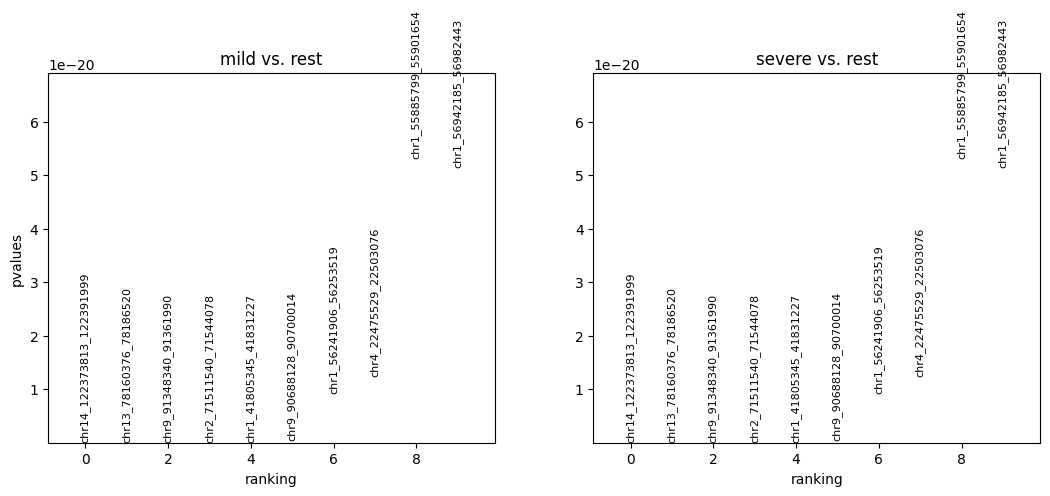

In [21]:
cc.pl.rank_peak_groups(adata_cc, key = 'fisher_exact', rankby = 'pvalues')

In [23]:
# concatenate fisher exact data
dedata1 = cc.tl.rank_peak_groups_df(adata_cc,'fisher_exact')

dedata1 = dedata1.set_index(['names'])

adata_cc.var = pd.concat([adata_cc.var, dedata1[(dedata1['group'] == 'severe')]], axis=1)

In [25]:
# transpose insertion counts
arrayT = array.T
arrayT

,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
name,,,,,,,,,,,,,,,,,,,,
chr1_3245070_3247104,0.0,2.0,0.0,18.0,3.0,15.0,2.0,15.0,7.0,5.0,2.0,6.0,5.0,9.0,10.0,14.0,13.0,5.0,6.0,10.0
chr1_3296871_3300418,1.0,4.0,0.0,15.0,3.0,8.0,1.0,15.0,21.0,6.0,2.0,0.0,2.0,6.0,3.0,8.0,7.0,2.0,3.0,7.0
chr1_3309788_3310809,1.0,3.0,2.0,7.0,0.0,3.0,0.0,11.0,6.0,2.0,1.0,2.0,3.0,1.0,5.0,3.0,2.0,2.0,5.0,2.0
chr1_3319892_3324705,1.0,4.0,1.0,20.0,5.0,9.0,1.0,19.0,17.0,6.0,6.0,2.0,2.0,8.0,14.0,11.0,6.0,10.0,7.0,6.0
chr1_3365567_3372481,1.0,6.0,3.0,31.0,4.0,16.0,2.0,36.0,13.0,8.0,5.0,14.0,2.0,19.0,21.0,28.0,11.0,6.0,18.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_169810037_169813700,0.0,1.0,0.0,12.0,1.0,9.0,0.0,9.0,3.0,1.0,1.0,3.0,0.0,3.0,5.0,8.0,7.0,3.0,5.0,2.0
chrX_169922506_169926762,1.0,2.0,1.0,10.0,3.0,5.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,2.0,1.0,5.0,6.0,2.0,1.0,0.0
chrX_169928521_169932808,0.0,1.0,0.0,7.0,4.0,12.0,1.0,4.0,5.0,0.0,1.0,1.0,2.0,5.0,4.0,6.0,3.0,2.0,2.0,4.0


In [26]:
# concatenate insertion counts
adata_cc.var = pd.concat([adata_cc.var, arrayT ], axis = 1)
adata_cc.var

,Chr,Start,End,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,...,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
chr1_3245070_3247104,chr1,3245070,3247104,NM_001011874,Xkr4,-,0.0,,,,...,2.0,6.0,5.0,9.0,10.0,14.0,13.0,5.0,6.0,10.0
chr1_3296871_3300418,chr1,3296871,3300418,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,...,2.0,0.0,2.0,6.0,3.0,8.0,7.0,2.0,3.0,7.0
chr1_3309788_3310809,chr1,3309788,3310809,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,...,1.0,2.0,3.0,1.0,5.0,3.0,2.0,2.0,5.0,2.0
chr1_3319892_3324705,chr1,3319892,3324705,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,...,6.0,2.0,2.0,8.0,14.0,11.0,6.0,10.0,7.0,6.0
chr1_3365567_3372481,chr1,3365567,3372481,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,...,5.0,14.0,2.0,19.0,21.0,28.0,11.0,6.0,18.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_169810037_169813700,chrX,169810037,169813700,NM_010797,Mid1,+,0.0,NM_001290504,Mid1,+,...,1.0,3.0,0.0,3.0,5.0,8.0,7.0,3.0,5.0,2.0
chrX_169922506_169926762,chrX,169922506,169926762,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,...,0.0,0.0,3.0,2.0,1.0,5.0,6.0,2.0,1.0,0.0
chrX_169928521_169932808,chrX,169928521,169932808,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,...,1.0,1.0,2.0,5.0,4.0,6.0,3.0,2.0,2.0,4.0
chrX_169979401_169985593,chrX,169979401,169985593,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,...,0.0,3.0,1.0,3.0,5.0,11.0,5.0,3.0,6.0,7.0


In [28]:
# rename columns
pd.set_option('display.max_columns', None)
adata_cc.var.rename(columns={'logfoldchanges': 'fisher_log2fc', 'pvalues': 'fisher_pval', 'pvalues_adj': 'fisher_pval_adj', 'number': 'insertions_severe', 'number_rest': 'insertions_mild', 'total': 'total_insertions_severe', 'total_rest': 'total_insertions_mild'}, inplace=True)
adata_cc.var

,Chr,Start,End,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,Distance2,Nearest Refseq3,Gene Name3,Direction3,Distance3,Nearest Refseq4,Gene Name4,Direction4,Distance4,Nearest Refseq5,Gene Name5,Direction5,Distance5,fisher_log2fc,fisher_pval,fisher_pval_adj,insertions_severe,insertions_mild,total_insertions_severe,total_insertions_mild,group,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
chr1_3245070_3247104,chr1,3245070,3247104,NM_001011874,Xkr4,-,0.0,,,,inf,,,,inf,,,,inf,,,,inf,0.402609,0.098191,0.498254,80,67,1749091,1950123,severe,0.0,2.0,0.0,18.0,3.0,15.0,2.0,15.0,7.0,5.0,2.0,6.0,5.0,9.0,10.0,14.0,13.0,5.0,6.0,10.0
chr1_3296871_3300418,chr1,3296871,3300418,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,990428.0,,,,inf,,,,inf,,,,inf,-0.706348,0.011002,0.216088,40,74,1749091,1950123,severe,1.0,4.0,0.0,15.0,3.0,8.0,1.0,15.0,21.0,6.0,2.0,0.0,2.0,6.0,3.0,8.0,7.0,2.0,3.0,7.0
chr1_3309788_3310809,chr1,3309788,3310809,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,980037.0,,,,inf,,,,inf,,,,inf,-0.256179,0.522221,0.854852,26,35,1749091,1950123,severe,1.0,3.0,2.0,7.0,0.0,3.0,0.0,11.0,6.0,2.0,1.0,2.0,3.0,1.0,5.0,3.0,2.0,2.0,5.0,2.0
chr1_3319892_3324705,chr1,3319892,3324705,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,966141.0,,,,inf,,,,inf,,,,inf,-0.047031,0.872343,0.994673,72,83,1749091,1950123,severe,1.0,4.0,1.0,20.0,5.0,9.0,1.0,19.0,17.0,6.0,6.0,2.0,2.0,8.0,14.0,11.0,6.0,10.0,7.0,6.0
chr1_3365567_3372481,chr1,3365567,3372481,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,918365.0,NM_011283,Rp1,-,971026.0,,,,inf,,,,inf,0.332711,0.069281,0.438880,136,120,1749091,1950123,severe,1.0,6.0,3.0,31.0,4.0,16.0,2.0,36.0,13.0,8.0,5.0,14.0,2.0,19.0,21.0,28.0,11.0,6.0,18.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_169810037_169813700,chrX,169810037,169813700,NM_010797,Mid1,+,0.0,NM_001290504,Mid1,+,14459.0,NM_001290506,Mid1,+,65919.0,NM_001331049,Hccs,-,-489666.0,NM_009707,Arhgap6,+,-505598.0,0.187018,0.560717,0.873818,37,36,1749091,1950123,severe,0.0,1.0,0.0,12.0,1.0,9.0,0.0,9.0,3.0,1.0,1.0,3.0,0.0,3.0,5.0,8.0,7.0,3.0,5.0,2.0
chrX_169922506_169926762,chrX,169922506,169926762,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-602135.0,NM_009707,Arhgap6,+,-618067.0,NM_001081978,Amelx,-,-735298.0,NM_001199212,Asmt,+,745882.0,-0.527383,0.171612,0.607896,20,33,1749091,1950123,severe,1.0,2.0,1.0,10.0,3.0,5.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,2.0,1.0,5.0,6.0,2.0,1.0,0.0
chrX_169928521_169932808,chrX,169928521,169932808,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-608150.0,NM_009707,Arhgap6,+,-624082.0,NM_001199212,Asmt,+,739836.0,NM_001081978,Amelx,-,-741313.0,-0.022322,1.000000,1.000000,30,34,1749091,1950123,severe,0.0,1.0,0.0,7.0,4.0,12.0,1.0,4.0,5.0,0.0,1.0,1.0,2.0,5.0,4.0,6.0,3.0,2.0,2.0,4.0
chrX_169979401_169985593,chrX,169979401,169985593,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-659030.0,NM_009707,Arhgap6,+,-674962.0,NM_001199212,Asmt,+,687051.0,NM_001081978,Amelx,-,-792193.0,0.248041,0.447514,0.815840,44,41,1749091,1950123,severe,1.0,3.0,0.0,9.0,5.0,3.0,1.0,6.0,8.0,5.0,0.0,3.0,1.0,3.0,5.0,11.0,5.0,3.0,6.0,7.0


In [29]:
# Write output to file
adata_cc.var.to_csv("complete_peaks_insertions.csv")

In [30]:
# read data to do correlations post-hoc
pd.set_option('display.max_columns', None)
data = pd.read_csv("complete_peaks_insertions.csv", index_col=0)
data

,Chr,Start,End,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,Distance2,Nearest Refseq3,Gene Name3,Direction3,Distance3,Nearest Refseq4,Gene Name4,Direction4,Distance4,Nearest Refseq5,Gene Name5,Direction5,Distance5,fisher_log2fc,fisher_pval,fisher_pval_adj,insertions_severe,insertions_mild,total_insertions_severe,total_insertions_mild,group,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
chr1_3245070_3247104,chr1,3245070,3247104,NM_001011874,Xkr4,-,0.0,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,0.402609,0.098191,0.498254,80,67,1749091,1950123,severe,0.0,2.0,0.0,18.0,3.0,15.0,2.0,15.0,7.0,5.0,2.0,6.0,5.0,9.0,10.0,14.0,13.0,5.0,6.0,10.0
chr1_3296871_3300418,chr1,3296871,3300418,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,990428.0,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,-0.706348,0.011002,0.216088,40,74,1749091,1950123,severe,1.0,4.0,0.0,15.0,3.0,8.0,1.0,15.0,21.0,6.0,2.0,0.0,2.0,6.0,3.0,8.0,7.0,2.0,3.0,7.0
chr1_3309788_3310809,chr1,3309788,3310809,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,980037.0,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,-0.256179,0.522221,0.854852,26,35,1749091,1950123,severe,1.0,3.0,2.0,7.0,0.0,3.0,0.0,11.0,6.0,2.0,1.0,2.0,3.0,1.0,5.0,3.0,2.0,2.0,5.0,2.0
chr1_3319892_3324705,chr1,3319892,3324705,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,966141.0,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,-0.047031,0.872343,0.994673,72,83,1749091,1950123,severe,1.0,4.0,1.0,20.0,5.0,9.0,1.0,19.0,17.0,6.0,6.0,2.0,2.0,8.0,14.0,11.0,6.0,10.0,7.0,6.0
chr1_3365567_3372481,chr1,3365567,3372481,NM_001011874,Xkr4,-,0.0,NM_001195662,Rp1,-,918365.0,NM_011283,Rp1,-,971026.0,NaN,NaN,NaN,inf,NaN,NaN,NaN,inf,0.332711,0.069281,0.438880,136,120,1749091,1950123,severe,1.0,6.0,3.0,31.0,4.0,16.0,2.0,36.0,13.0,8.0,5.0,14.0,2.0,19.0,21.0,28.0,11.0,6.0,18.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX_169810037_169813700,chrX,169810037,169813700,NM_010797,Mid1,+,0.0,NM_001290504,Mid1,+,14459.0,NM_001290506,Mid1,+,65919.0,NM_001331049,Hccs,-,-489666.0,NM_009707,Arhgap6,+,-505598.0,0.187018,0.560717,0.873818,37,36,1749091,1950123,severe,0.0,1.0,0.0,12.0,1.0,9.0,0.0,9.0,3.0,1.0,1.0,3.0,0.0,3.0,5.0,8.0,7.0,3.0,5.0,2.0
chrX_169922506_169926762,chrX,169922506,169926762,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-602135.0,NM_009707,Arhgap6,+,-618067.0,NM_001081978,Amelx,-,-735298.0,NM_001199212,Asmt,+,745882.0,-0.527383,0.171612,0.607896,20,33,1749091,1950123,severe,1.0,2.0,1.0,10.0,3.0,5.0,0.0,5.0,3.0,3.0,0.0,0.0,3.0,2.0,1.0,5.0,6.0,2.0,1.0,0.0
chrX_169928521_169932808,chrX,169928521,169932808,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-608150.0,NM_009707,Arhgap6,+,-624082.0,NM_001199212,Asmt,+,739836.0,NM_001081978,Amelx,-,-741313.0,-0.022322,1.000000,1.000000,30,34,1749091,1950123,severe,0.0,1.0,0.0,7.0,4.0,12.0,1.0,4.0,5.0,0.0,1.0,1.0,2.0,5.0,4.0,6.0,3.0,2.0,2.0,4.0
chrX_169979401_169985593,chrX,169979401,169985593,NM_010797,Mid1,+,0.0,NM_001331049,Hccs,-,-659030.0,NM_009707,Arhgap6,+,-674962.0,NM_001199212,Asmt,+,687051.0,NM_001081978,Amelx,-,-792193.0,0.248041,0.447514,0.815840,44,41,1749091,1950123,severe,1.0,3.0,0.0,9.0,5.0,3.0,1.0,6.0,8.0,5.0,0.0,3.0,1.0,3.0,5.0,11.0,5.0,3.0,6.0,7.0


In [31]:
# Create a copy of the original dataframe
norm_data = data.copy()
norm_data

In [36]:
# Calculate normalized counts per million for columns 31-51
norm_counts = data.iloc[:, 31:51].div(data.iloc[:, 31:51].sum(axis=0)) * 1000000

In [37]:
# Replace those columns in norm_data with the normalized values
norm_data.iloc[:, 31:51] = norm_counts

In [38]:
print(norm_data.iloc[:, 50].sum())  # Should be 1,000,000

1000000.0


In [40]:
# take only peaks that were significant on fisher's exact test after FDR correction
norm_data_sig = norm_data[norm_data['fisher_pval_adj'] < 0.05]
norm_data_sig

,Chr,Start,End,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,Distance2,Nearest Refseq3,Gene Name3,Direction3,Distance3,Nearest Refseq4,Gene Name4,Direction4,Distance4,Nearest Refseq5,Gene Name5,Direction5,Distance5,fisher_log2fc,fisher_pval,fisher_pval_adj,insertions_severe,insertions_mild,total_insertions_severe,total_insertions_mild,group,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
chr1_6730562_6739058,chr1,6730562,6739058,NM_001244693,St18,+,0.0,NM_001195732,Alkal1,+,-335832.0,NM_183028,Pcmtd1,+,349862.0,NM_009826,Rb1cc1,+,-454459.0,NM_010342,Npbwr1,-,-813165.0,0.763699,1.995855e-04,0.019242,120,78,1749091,1950123,severe,191.926300,13.844088,0.000000,32.772537,107.950559,10.235519,163.869953,16.922724,55.711402,68.346160,44.776788,62.178099,77.762916,88.668918,22.742003,11.004278,30.269092,171.959707,169.798506,118.405145
chr1_18971914_18981320,chr1,18971914,18981320,NM_153154,Tfap2d,+,121702.0,NM_001286340,Tfap2b,+,227594.0,NM_001025305,Tfap2b,+,230734.0,NM_183124,Defb41,-,-706777.0,NM_001039123,Defb18,-,-734472.0,0.380433,6.390564e-06,0.001382,631,540,1749091,1950123,severe,351.864884,844.489361,214.079281,210.129799,548.748673,197.886706,294.965915,278.016173,229.399890,273.384639,149.255959,259.075412,217.736166,310.341214,170.565025,473.183950,509.529719,271.515327,503.735567,423.765782
chr1_41119405_41125967,chr1,41119405,41125967,NM_001081198,Tmem182,+,-264139.0,NM_172499,Mfsd9,-,-328749.0,NM_001033289,Slc9a2,+,-350521.0,NM_177084,Slc9a4,+,-488675.0,NM_010553,Il18rap,+,-567701.0,-0.696098,8.736744e-06,0.001694,125,227,1749091,1950123,severe,127.950867,166.129055,35.679880,125.306761,125.942318,95.531513,98.321972,116.041533,134.362793,75.180776,119.404767,82.904132,155.525833,72.547297,87.177679,44.017112,45.403638,36.202044,45.279602,130.868844
chr1_41150335_41159059,chr1,41150335,41159059,NM_001081198,Tmem182,+,-295069.0,NM_172499,Mfsd9,-,-359679.0,NM_001033289,Slc9a2,+,-381451.0,NM_177084,Slc9a4,+,-519605.0,NM_010553,Il18rap,+,-598631.0,-0.465248,9.957952e-05,0.011667,236,364,1749091,1950123,severe,159.938584,83.064527,178.399401,210.129799,98.954679,255.887982,196.643943,157.139576,163.857064,218.707711,194.032747,134.719214,217.736166,108.820945,246.371703,82.532084,116.031520,99.555620,147.158705,87.245896
chr1_41426863_41430661,chr1,41426863,41430661,NM_001081198,Tmem182,+,-571597.0,NM_172499,Mfsd9,-,-636207.0,NM_001033289,Slc9a2,+,-657979.0,NM_177084,Slc9a4,+,-796133.0,NM_010553,Il18rap,+,-875159.0,-0.724316,1.297345e-04,0.014122,84,156,1749091,1950123,severe,63.975433,13.844088,35.679880,90.606427,116.946439,71.648635,32.773991,72.525958,98.314239,68.346160,89.553575,20.726033,31.105167,52.395270,79.597012,30.261764,45.403638,45.252555,39.619651,49.854798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19_27803048_27804980,chr19,27803048,27804980,NM_011265,Rfx3,-,0.0,NM_177474,Pum3,-,-373141.0,NM_175459,Glis3,-,453871.0,NM_183179,Kcnv2,+,-465870.0,NM_001347441,Vldlr,+,-548818.0,-0.975494,3.256723e-04,0.027751,37,83,1749091,1950123,severe,0.000000,41.532264,0.000000,40.483723,35.983520,47.765757,32.773991,43.515575,29.494272,88.850008,14.925596,10.363016,15.552583,12.091216,37.903339,30.261764,25.224244,18.101022,5.659950,12.463699
chrX_10485314_10491000,chrX,10485314,10491000,NM_019634,Tspan7,+,0.0,NM_008769,Otc,+,-164291.0,NM_001166635,Mid1ip1,+,226365.0,NM_001177950,Rpgr,-,-268520.0,NM_001177952,Rpgr,-,-268862.0,0.587152,4.009532e-04,0.032843,172,127,1749091,1950123,severe,31.987717,83.064527,142.719520,65.545075,80.962919,47.765757,131.095962,62.855830,68.819967,54.676928,104.479171,217.623346,124.420666,108.820945,68.226010,74.278876,85.762428,72.404087,96.219153,137.100694
chrX_23277257_23298329,chrX,23277257,23298329,NM_001290476,Klhl13,-,0.0,NM_001310466,Klhl13

In [41]:
# Just get sig norm ins counts
sig_norm_counts = norm_data_sig.iloc[:, 31:51]
sig_norm_counts

,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6
chr1_6730562_6739058,191.926300,13.844088,0.000000,32.772537,107.950559,10.235519,163.869953,16.922724,55.711402,68.346160,44.776788,62.178099,77.762916,88.668918,22.742003,11.004278,30.269092,171.959707,169.798506,118.405145
chr1_18971914_18981320,351.864884,844.489361,214.079281,210.129799,548.748673,197.886706,294.965915,278.016173,229.399890,273.384639,149.255959,259.075412,217.736166,310.341214,170.565025,473.183950,509.529719,271.515327,503.735567,423.765782
chr1_41119405_41125967,127.950867,166.129055,35.679880,125.306761,125.942318,95.531513,98.321972,116.041533,134.362793,75.180776,119.404767,82.904132,155.525833,72.547297,87.177679,44.017112,45.403638,36.202044,45.279602,130.868844
chr1_41150335_41159059,159.938584,83.064527,178.399401,210.129799,98.954679,255.887982,196.643943,157.139576,163.857064,218.707711,194.032747,134.719214,217.736166,108.820945,246.371703,82.532084,116.031520,99.555620,147.158705,87.245896
chr1_41426863_41430661,63.975433,13.844088,35.679880,90.606427,116.946439,71.648635,32.773991,72.525958,98.314239,68.346160,89.553575,20.726033,31.105167,52.395270,79.597012,30.261764,45.403638,45.252555,39.619651,49.854798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19_27803048_27804980,0.000000,41.532264,0.000000,40.483723,35.983520,47.765757,32.773991,43.515575,29.494272,88.850008,14.925596,10.363016,15.552583,12.091216,37.903339,30.261764,25.224244,18.101022,5.659950,12.463699
chrX_10485314_10491000,31.987717,83.064527,142.719520,65.545075,80.962919,47.765757,131.095962,62.855830,68.819967,54.676928,104.479171,217.623346,124.420666,108.820945,68.226010,74.278876,85.762428,72.404087,96.219153,137.100694
chrX_23277257_23298329,255.901734,221.505406,142.719520,117.595575,179.917598,78.472315,229.417934,200.655151,222.845607,246.046175,253.735130,269.438428,186.630999,193.459458,109.919683,231.089836,272.421830,380.121458,328.277111,411.302083
chrX_146957984_146964314,31.987717,55.376352,0.000000,21.205759,35.983520,0.000000,32.773991,24.175319,0.000000,27.338464,14.925596,82.904132,0.000000,24.182432,11.371002,38.514973,45.403638,9.050511,84.899253,43.622948


In [42]:
# seizure scores
Y = np.array([1, 1, 2, 2, 2, 2, 3, 2, 3, 3, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8])

In [43]:
# Prepare data for Spearman correlation of normalized insertion counts with seizure score
X = np.array(sig_norm_counts).T
X.shape

(20, 243)

In [44]:
# Run the correlations
# Spearman correlation for ordinal data
result_sp_corr_norm = []
for i in range(X.shape[1]):
    result_sp_corr_norm.append([sp.stats.spearmanr(X[:,i],Y)[0],sp.stats.spearmanr(X[:,i],Y)[1]])

In [45]:
# Spearman correlation for ordinal data
sp_corr_norm = pd.DataFrame(result_sp_corr_norm,columns = ['sp_corr_norm','sp_corr_norm_pvalue'], index = sig_norm_counts.index)
sp_corr_norm

,sp_corr_norm,sp_corr_norm_pvalue
chr1_6730562_6739058,0.238556,0.311117
chr1_18971914_18981320,0.012556,0.958101
chr1_41119405_41125967,-0.400993,0.079735
chr1_41150335_41159059,-0.172639,0.466708
chr1_41426863_41430661,-0.242479,0.302985
...,...,...
chr19_27803048_27804980,-0.301054,0.197107
chrX_10485314_10491000,0.393146,0.086375
chrX_23277257_23298329,0.399424,0.081032
chrX_146957984_146964314,0.115397,0.628057


In [46]:
# Apply FDR correction at alpha = 0.05 for spearman correlatiosn
rejected, padj = fdrcorrection(sp_corr_norm['sp_corr_norm_pvalue'], alpha=0.05)

In [47]:
# Add the adjusted p-values as a new column
sp_corr_norm['sp_corr_norm_padj'] = padj
sp_corr_norm

,sp_corr_norm,sp_corr_norm_pvalue,sp_corr_norm_padj
chr1_6730562_6739058,0.238556,0.311117,0.452704
chr1_18971914_18981320,0.012556,0.958101,0.962060
chr1_41119405_41125967,-0.400993,0.079735,0.248405
chr1_41150335_41159059,-0.172639,0.466708,0.577838
chr1_41426863_41430661,-0.242479,0.302985,0.443527
...,...,...,...
chr19_27803048_27804980,-0.301054,0.197107,0.357440
chrX_10485314_10491000,0.393146,0.086375,0.249871
chrX_23277257_23298329,0.399424,0.081032,0.248591
chrX_146957984_146964314,0.115397,0.628057,0.709850


In [48]:
# concatenate correlation data
sig_corr_data = pd.concat([norm_data_sig,sp_corr_norm], axis=1)
sig_corr_data

,Chr,Start,End,Nearest Refseq1,Gene Name1,Direction1,Distance1,Nearest Refseq2,Gene Name2,Direction2,Distance2,Nearest Refseq3,Gene Name3,Direction3,Distance3,Nearest Refseq4,Gene Name4,Direction4,Distance4,Nearest Refseq5,Gene Name5,Direction5,Distance5,fisher_log2fc,fisher_pval,fisher_pval_adj,insertions_severe,insertions_mild,total_insertions_severe,total_insertions_mild,group,9_4,3_2,5_2,4_3,1_5,4_2,5_1,16_7,14_5,15_7,7_4,5_5,6_5,3_1,2_2,9_5,8_1,11_1,11_5,16_6,sp_corr_norm,sp_corr_norm_pvalue,sp_corr_norm_padj
chr1_6730562_6739058,chr1,6730562,6739058,NM_001244693,St18,+,0.0,NM_001195732,Alkal1,+,-335832.0,NM_183028,Pcmtd1,+,349862.0,NM_009826,Rb1cc1,+,-454459.0,NM_010342,Npbwr1,-,-813165.0,0.763699,1.995855e-04,0.019242,120,78,1749091,1950123,severe,191.926300,13.844088,0.000000,32.772537,107.950559,10.235519,163.869953,16.922724,55.711402,68.346160,44.776788,62.178099,77.762916,88.668918,22.742003,11.004278,30.269092,171.959707,169.798506,118.405145,0.238556,0.311117,0.452704
chr1_18971914_18981320,chr1,18971914,18981320,NM_153154,Tfap2d,+,121702.0,NM_001286340,Tfap2b,+,227594.0,NM_001025305,Tfap2b,+,230734.0,NM_183124,Defb41,-,-706777.0,NM_001039123,Defb18,-,-734472.0,0.380433,6.390564e-06,0.001382,631,540,1749091,1950123,severe,351.864884,844.489361,214.079281,210.129799,548.748673,197.886706,294.965915,278.016173,229.399890,273.384639,149.255959,259.075412,217.736166,310.341214,170.565025,473.183950,509.529719,271.515327,503.735567,423.765782,0.012556,0.958101,0.962060
chr1_41119405_41125967,chr1,41119405,41125967,NM_001081198,Tmem182,+,-264139.0,NM_172499,Mfsd9,-,-328749.0,NM_001033289,Slc9a2,+,-350521.0,NM_177084,Slc9a4,+,-488675.0,NM_010553,Il18rap,+,-567701.0,-0.696098,8.736744e-06,0.001694,125,227,1749091,1950123,severe,127.950867,166.129055,35.679880,125.306761,125.942318,95.531513,98.321972,116.041533,134.362793,75.180776,119.404767,82.904132,155.525833,72.547297,87.177679,44.017112,45.403638,36.202044,45.279602,130.868844,-0.400993,0.079735,0.248405
chr1_41150335_41159059,chr1,41150335,41159059,NM_001081198,Tmem182,+,-295069.0,NM_172499,Mfsd9,-,-359679.0,NM_001033289,Slc9a2,+,-381451.0,NM_177084,Slc9a4,+,-519605.0,NM_010553,Il18rap,+,-598631.0,-0.465248,9.957952e-05,0.011667,236,364,1749091,1950123,severe,159.938584,83.064527,178.399401,210.129799,98.954679,255.887982,196.643943,157.139576,163.857064,218.707711,194.032747,134.719214,217.736166,108.820945,246.371703,82.532084,116.031520,99.555620,147.158705,87.245896,-0.172639,0.466708,0.577838
chr1_41426863_41430661,chr1,41426863,41430661,NM_001081198,Tmem182,+,-571597.0,NM_172499,Mfsd9,-,-636207.0,NM_001033289,Slc9a2,+,-657979.0,NM_177084,Slc9a4,+,-796133.0,NM_010553,Il18rap,+,-875159.0,-0.724316,1.297345e-04,0.014122,84,156,1749091,1950123,severe,63.975433,13.844088,35.679880,90.606427,116.946439,71.648635,32.773991,72.525958,98.314239,68.346160,89.553575,20.726033,31.105167,52.395270,79.597012,30.261764,45.403638,45.252555,39.619651,49.854798,-0.242479,0.302985,0.443527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19_27803048_27804980,chr19,27803048,27804980,NM_011265,Rfx3,-,0.0,NM_177474,Pum3,-,-373141.0,NM_175459,Glis3,-,453871.0,NM_183179,Kcnv2,+,-465870.0,NM_001347441,Vldlr,+,-548818.0,-0.975494,3.256723e-04,0.027751,37,83,1749091,1950123,severe,0.000000,41.532264,0.000000,40.483723,35.983520,47.765757,32.773991,43.515575,29.494272,88.850008,14.925596,10.363016,15.552583,12.091216,37.903339,30.261764,25.224244,18.101022,5.659950,12.463699,-0.301054,0.197107,0.357440
chrX_10485314_10491000,chrX,10485314,10491000,NM_019634,Tspan7,+,0.0,NM_008769,Otc,+,-164291.0,NM_001166635,Mid1ip1,+,226365.0,NM_001177950,Rpgr,-,-268520.0,NM_001177952,Rpgr,-,-268862.0,0.587152,4.009532e-04,0.032843,172,127,1749091,1950123,severe,31.987717,83.064527,142.719520,65.545075,80.962919,47.765757,131.0959

In [ ]:
# Write to file
sig_corr_data.to_csv("sig_corr_norm.csv")